# Team Epic 
# Telco Customer Churn Analysis


## `Initial Data Analysis `

## Table of Content 

* Business Problem.
* Introducing the dataset.

###  *_1. Business Problem_*
Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers. In this project, we need to explore the features that will help the company to engage with the customers and keep the customer happy. Specifically, in this project, we will target customers who are likely to leave the service and how we can retain them. To reduce customer churn, first of all we need to predict which customers are at high risk of churn.

We will use our data science powers to analyze the customer's engagement with the company and the factors which help to hold the customer. The advantages of each factor will then be clearly expressed so that the best plan or possible idea will be taken by the company.

### *_2. Introducing the dataset_*
Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.
Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next.
Telco dataset consists of information about the customer's id, mobile services, and charges. The dataset consists of **31 variables and 4718 observations**, stored in python pandas dataframe "df".

* **Importing the requierd liberaries.**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* **Loading the dataset(5 rows)** 

In [2]:
df = pd.read_csv("TelcoCustomerChurn1.csv")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Reason,Churn Value
0,5196-WPYOW,1.0,United States,California,Paso Robles,93446.0,"35.634222, -120.728341",35.634222,-120.728341,Male,...,No,No,One year,No,Mailed check,60.05,3994.05,6148.0,NaN,0.0
1,8189-HBVRW,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,No,Electronic check,90.80,4921.2,5249.0,NaN,0.0
2,4091-TVOCN,1.0,United States,California,Potrero,91963.0,"32.619465, -116.593605",32.619465,-116.593605,Male,...,Yes,Yes,One year,Yes,Credit card (automatic),78.75,3682.45,2257.0,NaN,0.0
3,9603-OAIHC,1.0,United States,California,Palmdale,93551.0,"34.613476, -118.256358",34.613476,-118.256358,Male,...,No,No,Month-to-month,Yes,Electronic check,70.05,70.05,2469.0,NaN,0.0
4,8647-SDTWQ,1.0,United States,California,Hood,95639.0,"38.375325, -121.507935",38.375325,-121.507935,Male,...,No,No,Month-to-month,Yes,Electronic check,74.30,4018.35,4133.0,NaN,0.0


* **There are only 8 columns with numerical values & there are total 4718 observations.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         4687 non-null   object 
 1   Count              4691 non-null   float64
 2   Country            4708 non-null   object 
 3   State              4715 non-null   object 
 4   City               4688 non-null   object 
 5   Zip Code           4698 non-null   float64
 6   Lat Long           4713 non-null   object 
 7   Latitude           4695 non-null   float64
 8   Longitude          4685 non-null   float64
 9   Gender             4698 non-null   object 
 10  Senior Citizen     4711 non-null   object 
 11  Partner            4678 non-null   object 
 12  Dependents         4672 non-null   object 
 13  Tenure Months      4704 non-null   float64
 14  Phone Service      4692 non-null   object 
 15  Multiple Lines     4696 non-null   object 
 16  Internet Service   4692 

* **Now, here we need to drop some columns which are not much required for our analysis.**

In [4]:
data = df.drop(["Count", "Country", "State", "City", "Zip Code", "Latitude", "Longitude", "Lat Long", "Churn Reason"], axis =1)

* **Columns "TotalCharges" seems string although it has numerical, I will change the data type from object into float64.**

In [5]:
data["Total Charges"] = pd.to_numeric(data["Total Charges"], errors='coerce')

In [6]:
data.dtypes

CustomerID            object
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months        float64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
CLTV                 float64
Churn Value          float64
dtype: object

* **Now, Here we need to convert non numerical feature into numerical in order to make explore data.**

In [7]:
data.select_dtypes("object").columns

Index(['CustomerID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method'],
      dtype='object')

* **Lets drop customerID column because this column will not affect our target column.**

In [8]:
data.drop(["CustomerID"], axis = 1, inplace=True)

* **Here except from customerID column, all of the other columns can be convertible into numerical values because they have 2, 3 or 4 different value**



In [9]:
for i in data.columns:
    if data[i].dtypes=="object":
        print(f'{i} : {data[i].unique()}')

Gender : ['Male' 'Female' nan]
Senior Citizen : ['No' 'Yes' nan]
Partner : ['Yes' 'No' nan]
Dependents : ['Yes' 'No' nan]
Phone Service : ['Yes' 'No' nan]
Multiple Lines : ['No' 'Yes' 'No phone service' nan]
Internet Service : ['DSL' 'Fiber optic' 'No' nan]
Online Security : ['Yes' 'No' 'No internet service' nan]
Online Backup : ['Yes' 'No' 'No internet service' nan]
Device Protection : ['No' 'Yes' 'No internet service' nan]
Tech Support : ['Yes' nan 'No' 'No internet service']
Streaming TV : ['No' 'Yes' 'No internet service' nan]
Streaming Movies : ['No' 'Yes' 'No internet service' nan]
Contract : ['One year' 'Month-to-month' 'Two year' nan]
Paperless Billing : ['No' 'Yes' nan]
Payment Method : ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)' nan]


**Above cell shows us the list of all features with their respective categorical variables**

* **Replace long negative text by "No" for ease of access**

In [10]:
data.replace('No internet service', 'No', inplace=True)
data.replace('No phone service', 'No', inplace=True)

In [11]:
data["Gender"].replace(to_replace=['Male', 'Female'], value=[0, 1], inplace= True)

* **Firstly converting categorical feature with 2 values into numerical with the help of replace function.**

In [12]:
two_value = ["Senior Citizen", 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing']
for i in two_value:
    data[i].replace({"No":0, "Yes":1}, inplace=True)
data.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Value
0,0.0,0.0,1.0,1.0,67.0,1.0,0.0,DSL,1.0,1.0,...,1.0,0.0,0.0,One year,0.0,Mailed check,60.05,3994.05,6148.0,0.0
1,1.0,0.0,0.0,0.0,53.0,1.0,1.0,Fiber optic,1.0,1.0,...,NaN,0.0,0.0,Month-to-month,0.0,Electronic check,90.80,4921.20,5249.0,0.0
2,0.0,0.0,0.0,0.0,48.0,1.0,1.0,DSL,1.0,0.0,...,0.0,1.0,1.0,One year,1.0,Credit card (automatic),78.75,3682.45,2257.0,0.0
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,Fiber optic,0.0,0.0,...,0.0,0.0,0.0,Month-to-month,1.0,Electronic check,70.05,70.05,2469.0,0.0
4,0.0,0.0,1.0,1.0,57.0,1.0,1.0,Fiber optic,0.0,0.0,...,0.0,0.0,0.0,Month-to-month,1.0,Electronic check,74.30,4018.35,4133.0,0.0


In [13]:
print(data['Internet Service'].value_counts())

Fiber optic    2053
DSL            1618
No             1021
Name: Internet Service, dtype: int64


* **There are few features in which categorical variables are more than two and they are not "Yes" or "No" types**

In [14]:
for i in data.columns:
    if (len(data[i].unique()) >2) & (data[i].dtypes != "int64") &(data[i].dtypes!= "float64"):
        print(i)

Internet Service
Contract
Payment Method


* **So, to deal with such kind of feature column we are required to use one-hot encoding.**


In [15]:
col_with_val_3 = ['Internet Service' ,'Contract' ,'Payment Method']
data = pd.get_dummies(data=data, columns= col_with_val_3)
data.dtypes

Gender                                      float64
Senior Citizen                              float64
Partner                                     float64
Dependents                                  float64
Tenure Months                               float64
Phone Service                               float64
Multiple Lines                              float64
Online Security                             float64
Online Backup                               float64
Device Protection                           float64
Tech Support                                float64
Streaming TV                                float64
Streaming Movies                            float64
Paperless Billing                           float64
Monthly Charges                             float64
Total Charges                               float64
CLTV                                        float64
Churn Value                                 float64
Internet Service_DSL                          uint8
Internet Ser

In [16]:
data.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,...,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0.0,0.0,1.0,1.0,67.0,1.0,0.0,1.0,1.0,0.0,...,1,0,0,0,1,0,0,0,0,1
1,1.0,0.0,0.0,0.0,53.0,1.0,1.0,1.0,1.0,1.0,...,0,1,0,1,0,0,0,0,1,0
2,0.0,0.0,0.0,0.0,48.0,1.0,1.0,1.0,0.0,1.0,...,1,0,0,0,1,0,0,1,0,0
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,1,0
4,0.0,0.0,1.0,1.0,57.0,1.0,1.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,1,0


* **Lets get overall statistical information on our features,** **I will use decribe() function and transpose the result by using transpose() function**

In [17]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,4698.0,0.493189,0.500007,0.00,0.0000,0.000,1.000,1.00
Senior Citizen,4711.0,0.158990,0.365705,0.00,0.0000,0.000,0.000,1.00
Partner,4678.0,0.487815,0.499905,0.00,0.0000,0.000,1.000,1.00
Dependents,4672.0,0.231164,0.421622,0.00,0.0000,0.000,0.000,1.00
Tenure Months,4704.0,32.733418,24.605091,0.00,9.0000,30.000,56.000,72.00
Phone Service,4692.0,0.902174,0.297111,0.00,1.0000,1.000,1.000,1.00
Multiple Lines,4696.0,0.426746,0.494657,0.00,0.0000,0.000,1.000,1.00
Online Security,4674.0,0.291185,0.454357,0.00,0.0000,0.000,1.000,1.00
Online Backup,4714.0,0.346415,0.475878,0.00,0.0000,0.000,1.000,1.00
Device Protection,4711.0,0.348758,0.476628,0.00,0.0000,0.000,1.000,1.00


In [18]:
data.corr()[["Churn Value"]]

,Churn Value
Gender,0.010666
Senior Citizen,0.146709
Partner,-0.150863
Dependents,-0.256163
Tenure Months,-0.351411
Phone Service,0.009465
Multiple Lines,0.042825
Online Security,-0.160913
Online Backup,-0.082375
Device Protection,-0.068212


#### According to these above values `Contract_Month-to-month`, `Internet Service_Fiber optic`, `Payment Method_Electronic check`, `Monthly Charges`, `Paperless Billing`, and  `Senior Citizen`  feature variables are highly positively correlated with target variables. therefore if there is a monthly contract between customer and service provider,   internet service uses fiber optic, mode of payment is an electronic check,  plan with monthly validity,  and billing mode is paperless or no online security or no technical support to the customer then the customer will tend to churn.
**For understnading(No = 0 & yes = 1) as we know that correlation lies between +1 to -1, so it means that if the value is negative then it likely to be "No" as the answer and vice versa.**

In [19]:
data["Churn Value"].value_counts()

0.0    3428
1.0    1265
Name: Churn Value, dtype: int64

###  3. Data Visualization

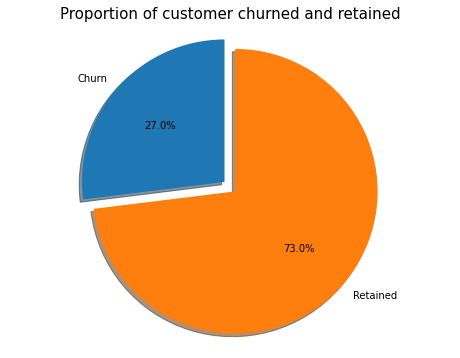

In [20]:
labels = 'Churn', 'Retained'
sizes = [data["Churn Value"][data["Churn Value"]==1].count(), data["Churn Value"][data["Churn Value"]==0].count()]
fig1, ax1 = plt.subplots(figsize=(8, 6))
explode = (0, 0.1)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 15)
plt.show()

**`So about 27.0% of the customers have churned while 73.0% have retained. So the baseline model could be to predict that 27.0% of the customers will churn. This means that we have an unbalanced target which can affect the performance of the model and its predictions negatively if we do not deal with this issue.`**

#####  *_Contract Type and Churn Relationship:_*